___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [1729]:
df = pd.read_csv("C:\Data Science\ML\Projects\ML - Project-3 Clustering_Analysis_Customers_Segmentation_Project\Mall_Customers.csv")
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
22,23,Female,46,25,5
58,59,Female,27,46,51
192,193,Male,33,113,8
98,99,Male,48,61,42
172,173,Male,36,87,10
159,160,Female,30,78,73
108,109,Male,68,63,43
89,90,Female,50,58,46
36,37,Female,42,34,17
145,146,Male,28,77,97


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [1732]:
df.shape

(200, 5)

In [1733]:
df.info() # no NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [1734]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [1735]:
# we don't expect outliers (compare Min, Max, Mean)

In [1736]:
df = df.drop('CustomerID', axis=1)

In [1737]:
# df['Gender'].value_counts()
percentages = df['Gender'].value_counts(normalize=True) * 100
print(percentages)

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [1724]:
df.Gender = df.Gender.map( {'Female':0, 'Male':1}) # | to get categorical variable gender into pairplot

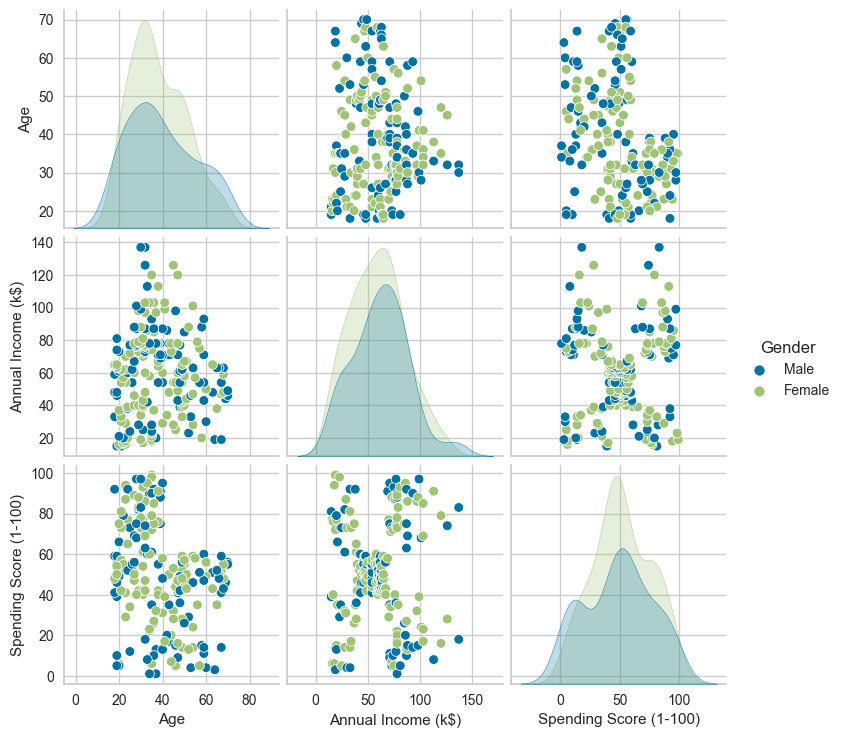

In [1738]:
# sns.pairplot(df)
# plt.show()
sns.pairplot(df, hue='Gender')
plt.show()

In [1676]:
# we can have between 2 and 7 clusters when looking at pairplot(df)
# gender does not seem to separate well

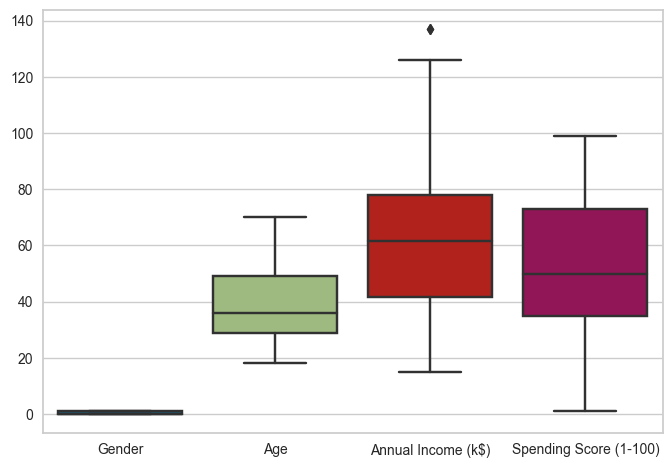

In [1677]:
sns.boxplot(df)
plt.show()

In [1678]:
# | Can we use Gender? K-Means and Hierarchical Clustering do NOT allow the use of categorical features, we have to use other alg.

In [1679]:
df = df.drop('Gender', axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


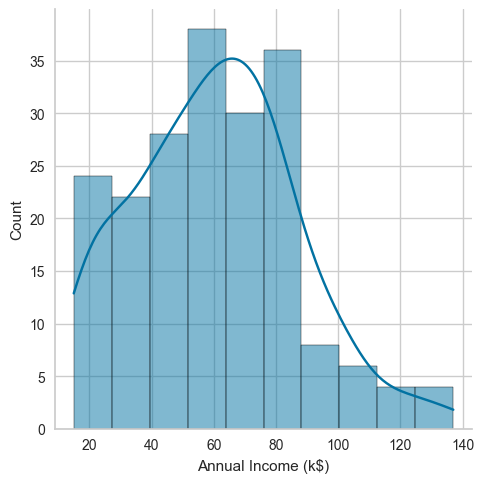

In [1680]:
sns.displot(df['Annual Income (k$)'], kde = True) # Innerhalb ' k ö nnen Leerzeichen sein'

<Axes: >

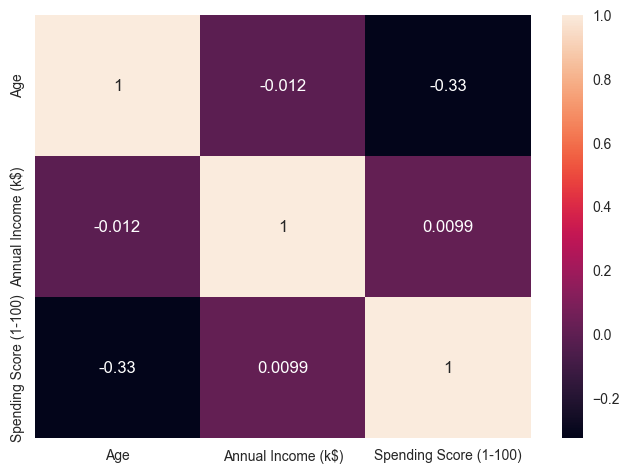

In [1681]:
sns.heatmap(df.select_dtypes('number').corr(), annot = True)

In [1682]:
df.value_counts()

Age  Annual Income (k$)  Spending Score (1-100)
18   33                  92                        1
47   43                  41                        1
43   71                  35                        1
     78                  17                        1
44   73                  7                         1
                                                  ..
31   81                  93                        1
32   48                  47                        1
     60                  42                        1
     73                  73                        1
70   49                  55                        1
Name: count, Length: 200, dtype: int64

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [1683]:
X = df.copy()
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [1684]:
X = df.drop("Annual Income (k$)", axis=1)
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [1685]:
X.shape

(200, 2)

Scaling after X = df.copy, before we start clustering

In [1686]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform='pandas')
X_scaled = scaler.fit_transform(X)
X_scaled.sample(6)

,Age,Spending Score (1-100)
1,0.057692,0.816327
26,0.519231,0.316327
14,0.365385,0.122449
153,0.384615,0.765306
81,0.384615,0.551020
23,0.250000,0.734694


#### *ii. Determine optimal number of clusters*

In [1687]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=8, random_state=42, n_init=10)
K_means_model.fit(X)

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_init=10, random_state=42)

In [1688]:
K_means_model.predict(X) 

array([4, 0, 3, 0, 4, 0, 3, 5, 7, 0, 7, 5, 7, 0, 3, 0, 1, 0, 1, 5, 1, 0,
       7, 0, 7, 5, 1, 0, 1, 5, 7, 0, 7, 5, 7, 0, 7, 0, 1, 0, 2, 5, 1, 0,
       1, 0, 6, 4, 4, 4, 6, 0, 4, 2, 6, 1, 6, 2, 4, 6, 2, 4, 2, 6, 2, 4,
       6, 2, 4, 4, 2, 6, 2, 2, 2, 4, 6, 6, 4, 6, 2, 6, 2, 6, 4, 6, 6, 4,
       0, 6, 2, 4, 6, 1, 4, 4, 6, 4, 6, 4, 4, 6, 2, 4, 6, 4, 2, 6, 2, 2,
       2, 4, 1, 4, 4, 4, 2, 6, 6, 6, 4, 1, 6, 5, 4, 0, 1, 5, 7, 0, 7, 0,
       4, 0, 3, 5, 7, 0, 3, 0, 7, 5, 4, 5, 3, 5, 1, 0, 3, 5, 7, 5, 7, 0,
       7, 5, 3, 0, 3, 0, 1, 5, 3, 5, 1, 0, 7, 5, 1, 0, 3, 0, 3, 5, 7, 5,
       7, 0, 7, 5, 1, 5, 7, 5, 1, 5, 7, 0, 7, 5, 3, 0, 3, 5, 7, 0, 1, 0,
       3, 5])

In [1689]:
K_means_model.fit_predict(X)

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 3, 0, 4, 0, 3, 5, 7, 0, 7, 5, 7, 0, 3, 0, 1, 0, 1, 5, 1, 0,
       7, 0, 7, 5, 1, 0, 1, 5, 7, 0, 7, 5, 7, 0, 7, 0, 1, 0, 2, 5, 1, 0,
       1, 0, 6, 4, 4, 4, 6, 0, 4, 2, 6, 1, 6, 2, 4, 6, 2, 4, 2, 6, 2, 4,
       6, 2, 4, 4, 2, 6, 2, 2, 2, 4, 6, 6, 4, 6, 2, 6, 2, 6, 4, 6, 6, 4,
       0, 6, 2, 4, 6, 1, 4, 4, 6, 4, 6, 4, 4, 6, 2, 4, 6, 4, 2, 6, 2, 2,
       2, 4, 1, 4, 4, 4, 2, 6, 6, 6, 4, 1, 6, 5, 4, 0, 1, 5, 7, 0, 7, 0,
       4, 0, 3, 5, 7, 0, 3, 0, 7, 5, 4, 5, 3, 5, 1, 0, 3, 5, 7, 5, 7, 0,
       7, 5, 3, 0, 3, 0, 1, 5, 3, 5, 1, 0, 7, 5, 1, 0, 3, 0, 3, 5, 7, 5,
       7, 0, 7, 5, 1, 5, 7, 5, 1, 5, 7, 0, 7, 5, 3, 0, 3, 5, 7, 0, 1, 0,
       3, 5])

Hopkins test

In [1690]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size): # | if your data is too big, it can be costly, so  you can give it a smaller sample
    # whe have only 150 data p0oints, so we don't need to do this.
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception("The number of sample of sample is bigger than the shape of D")
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(
        min_data_frame[0], max_data_frame[0], sampling_size
    )
    uniformly_selected_values_1 = np.random.uniform(
        min_data_frame[1], max_data_frame[1], sampling_size
    )
    uniformly_selected_observations = np.column_stack(
        (uniformly_selected_values_0, uniformly_selected_values_1)
    )
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(
                min_data_frame[i], max_data_frame[i], sampling_size
            )
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception("The denominator of the hopkins statistics is null")
    return x / (x + y)[0]

In [1691]:
hopkins(X, X.shape[0]) # Hopkins (before we determine K): how randomly is data distributed? Should be < 0.5

0.30708542191036775

Choosing The Optimal Number of Clusters

Elbow Method 1) Inertia

In [1692]:
ssd = [] # sum of squared distances, ssd should be small

K = range(2, 10) # K from 2 to 10

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    ssd.append(model.inertia_)

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'elbow method')

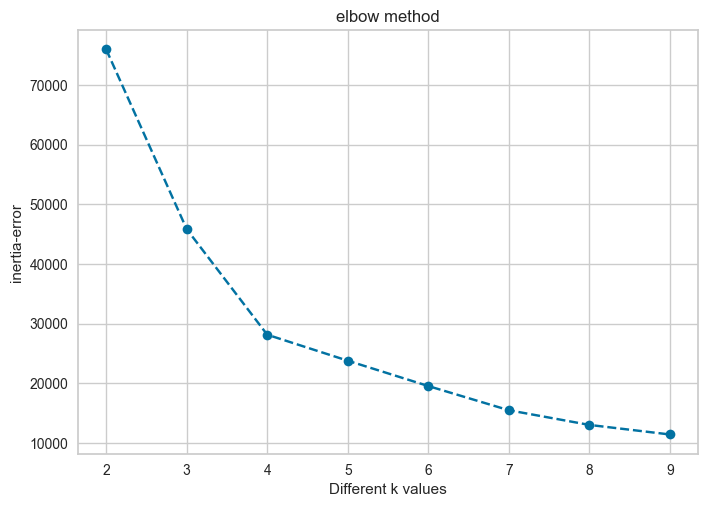

In [1693]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [1694]:
ssd  # sum of squared distance k=2,3,4,...,9

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19566.522341377604,
 15514.193134351028,
 13055.626865965573,
 11453.288911292719]

In [1695]:
-pd.Series(ssd).diff()  # | difference between the Ks

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
dtype: float64

Elbow Method 2) Distortion

In [1696]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(
        X
    )  # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[
            labels == i, i
        ]  # distances from observations in each cluster to their own centroid
        result.append(
            np.mean(cluster_distances**2)
        )  # | calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(
        sum(result)
    ) 

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'elbow method')

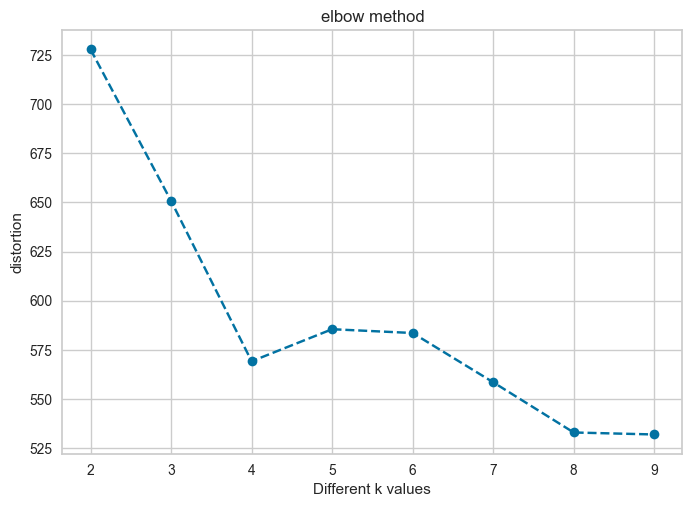

In [1697]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [1698]:
# | Which K to pick?

# 1) Distance within the same cluster (compactness):
#    elbow method works by considering inertia and distortion
#
# 2) Distance BETWEEN clusters
#    Silhouette

## Silhouette analysis - not only inter cluster distance (like inertia and distortion), but also intra cluster distance

In [1699]:
silhouette_score(X, K_means_model.labels_)

0.4280182657184854

In [1700]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854


C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [1701]:
# K = 4 looks really good

Visualizing and Labeling All the Clusters

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


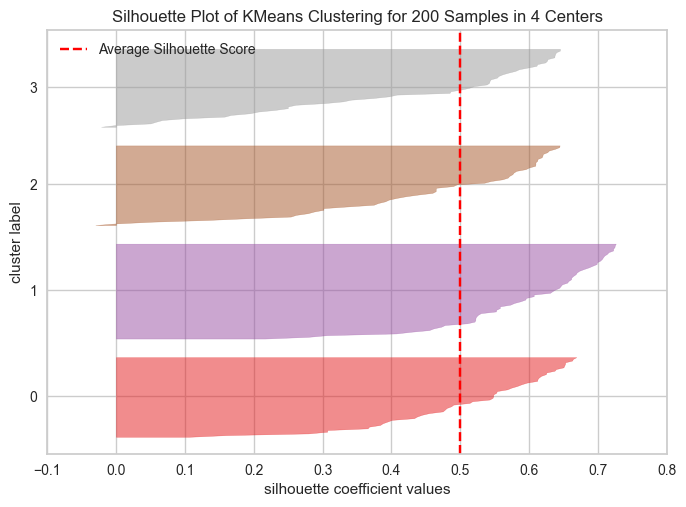

In [1702]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42, n_init=10)  # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)  # Fit the data to the visualizer
visualizer.poof();

In [1703]:
model3.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [1704]:
visualizer.silhouette_samples_ # | We can see the individual silhouette scores of the observations.
# we don't have scores < 0, but technically, it's possible

array([ 5.41704401e-01,  6.06427697e-01,  3.90692354e-01,  5.72388690e-01,
        4.85877135e-01,  5.29623931e-01,  5.99685286e-01,  6.45443747e-01,
        4.38661178e-01,  4.77367625e-01,  3.01027300e-01,  6.33591468e-01,
        4.64200102e-01,  5.87165454e-01,  6.11887393e-01,  5.95298366e-01,
        2.49515369e-01, -6.38269698e-04,  5.35146574e-02,  6.43523035e-01,
        2.49515369e-01,  4.72208348e-01,  6.28460918e-01,  5.23057518e-01,
        5.44149704e-01,  7.05479532e-01,  1.80808145e-03,  2.61008835e-01,
        1.32902431e-01,  6.68864152e-01,  4.94735307e-01,  4.06403093e-01,
        5.75372306e-01,  5.94131411e-01,  6.08580878e-01,  6.06427697e-01,
        6.19692628e-01,  5.21751518e-01,  3.01363453e-01,  4.60993550e-01,
        3.93975989e-01,  6.67339529e-01,  3.06655386e-01,  3.03109441e-01,
        1.89220192e-01,  5.00927844e-02,  4.86477440e-01,  6.26659654e-01,
        5.55217490e-01,  5.12603191e-01,  4.89791113e-01,  3.41182419e-01,
        5.42290734e-01,  

In [1705]:
## | Let's do same thing above for all classes: 
for i in range(4):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.5091299145013191
mean silhouette score for label 1     : 0.5960779476836082
mean silhouette score for label 2     : 0.45429047261675404
mean silhouette score for label 3     : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


Settling for K: Building the model based on the optimal number of clusters

I decided to go with K = 4, since Silhouette Score is best and Elbow Chart confirms it

In [1706]:
# How should we call those 4 clusters? We do a group by age and Spending Score (1-100)

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [1707]:
# After we have decided on K = 4, now we can apply K Means
# We can't "do ARI" since we don't have labels

#### *iii. Apply K Means*

In [1708]:
model = KMeans(n_clusters=4, random_state=42, n_init=10)  # || Again, we must use random_state=42, like we did before!! otherwise we'll got possibly different clusters
model.fit_predict(X)

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [1709]:
model.labels_ 

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [1710]:
X['Labels'] = model.labels_ 
X

,Age,Spending Score (1-100),Labels
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


In [1711]:
result = X.groupby('Labels').agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()
result

,Labels,Age,Spending Score (1-100)
0,0,55.708333,48.229167
1,1,30.175439,82.350877
2,2,43.291667,15.020833
3,3,27.617021,49.148936


In [1712]:
result = X.groupby('Labels').agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean',
}).reset_index()

# Add a new column 'Count' to show the number of occurrences of each cluster
result['Count'] = X['Labels'].value_counts()

result




,Labels,Age,Spending Score (1-100),Count
0,0,55.708333,48.229167,48
1,1,30.175439,82.350877,57
2,2,43.291667,15.020833,48
3,3,27.617021,49.148936,47


In [1713]:
cluster_names = {
    0: "avg_spend_old",
    1: "splash_young",
    2: "thrifty",
    3: "avg_spend_young"
}

X['Cluster Names'] = X['Labels'].map(cluster_names)

# Drop the 'Labels' column if you don't need it anymore


X.drop('Labels', axis=1, inplace=True)
X

,Age,Spending Score (1-100),Cluster Names
0,19,39,avg_spend_young
1,21,81,splash_young
2,20,6,thrifty
3,23,77,splash_young
4,31,40,avg_spend_young
...,...,...,...
195,35,79,splash_young
196,45,28,thrifty
197,32,74,splash_young
198,32,18,thrifty


#### *iv. Visualizing and Labeling All the Clusters*

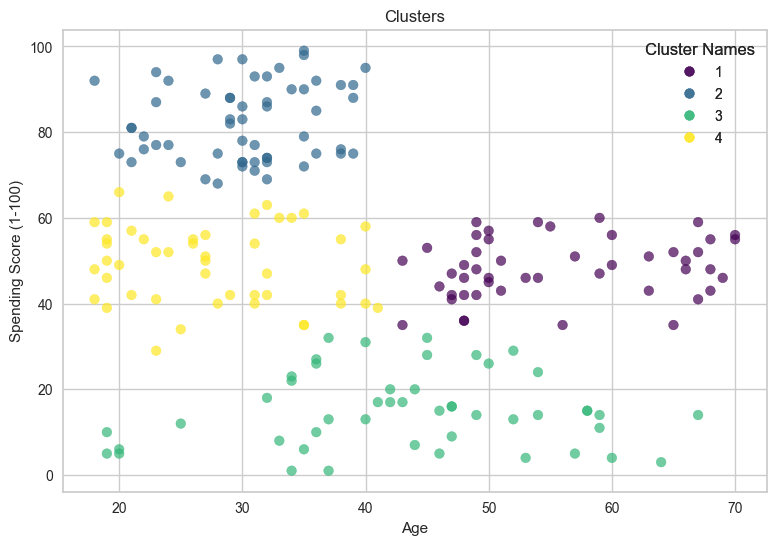

In [1714]:
# Define a mapping for the cluster names to numerical labels
cluster_mapping = {
    "avg_spend_old": 1,
    "splash_young": 2,
    "thrifty": 3,
    "avg_spend_young": 4
}

# Map the cluster names to numerical labels
X['Cluster Labels'] = X['Cluster Names'].map(cluster_mapping)

# Drop rows with NaN values in 'Cluster Labels' column
X.dropna(subset=['Cluster Labels'], inplace=True)

# Drop the 'Cluster Names' column if you don't need it anymore
X.drop('Cluster Names', axis=1, inplace=True)

# Visualize the clusters using scatter plot
plt.figure(figsize=(20, 6))

# We will randomly select 2 features and look at their distribution with each other
plt.subplot(121)
scatter = plt.scatter(
    X["Age"],
    X["Spending Score (1-100)"],
    c=X['Cluster Labels'],  # Use the numerical labels for coloring
    cmap="viridis",
    alpha=0.7,
)

# Add legend with cluster names
legend = plt.legend(
    *scatter.legend_elements(),
    loc="upper right",
    title="Cluster Names"
)
plt.gca().add_artist(legend)

plt.title("Clusters")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

# Other plotting commands as needed
# ...

plt.show()



In [1665]:
# Create a reverse mapping dictionary to map numerical labels back to cluster names
reverse_cluster_mapping = {v: k for k, v in cluster_mapping.items()}

# Print numerical labels and their corresponding cluster names
for label, cluster_name in reverse_cluster_mapping.items():
    print(f"{label} = {cluster_name}")


1 = avg_spend_old
2 = splash_young
3 = thrifty
4 = avg_spend_young


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [1531]:
X_HC = X.copy()

# Drop the column 'Cluster Labels'
X_HC.drop('Cluster Labels', axis=1, inplace=True)

# Convert the resulting table into a DataFrame
X_HC = pd.DataFrame(X_HC)

# Now X_HC will contain the DataFrame without the 'Cluster Labels' column
X_HC

,Age,Spending Score (1-100)
0,19,39
1,21,81
3,23,77
4,31,40
5,22,76
...,...,...
191,32,69
193,38,91
195,35,79
197,32,74


In [1532]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np

def hopkins(X, ratio=0.05):
    if not isinstance(X, np.ndarray):
        X = X.values  # convert DataFrame to a numpy array

    # 0.05 (5%) based on the paper by Lawson and Jurs
    sample_size = int(X.shape[0] * ratio)

    # A uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))

    # A random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # Initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(
        X_uniform_random_sample, n_neighbors=2)
    # Distance to the first (nearest) neighbour
    u_distances = u_distances[:, 0]

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # Distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # Compute and return Hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

# Now, you can call the function with X_HC
hopkins_statistic = hopkins(X_HC)
print("Hopkins Statistic:", hopkins_statistic)


Hopkins Statistic: 0.6734409703913166


In [1533]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [1534]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")


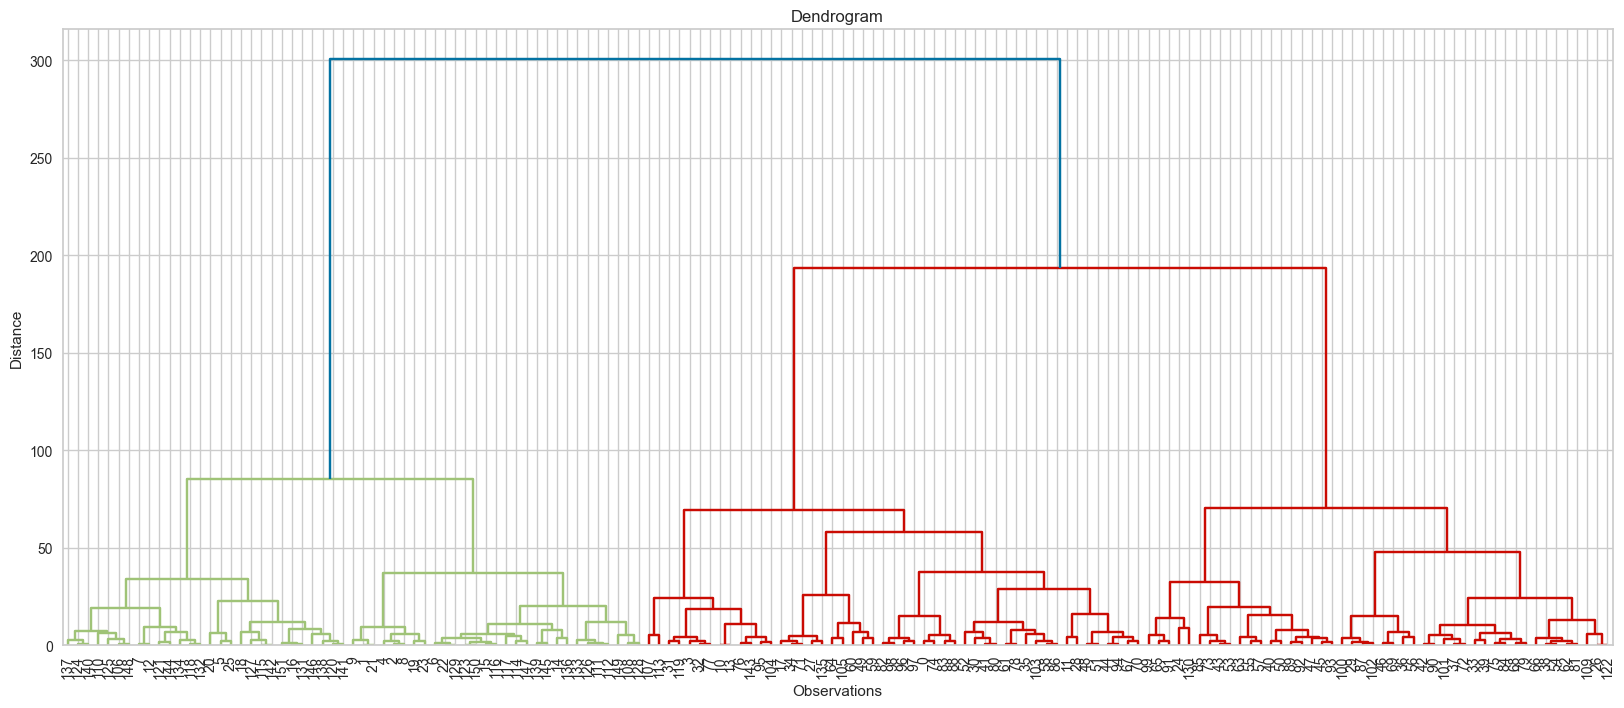

In [1535]:
plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10);

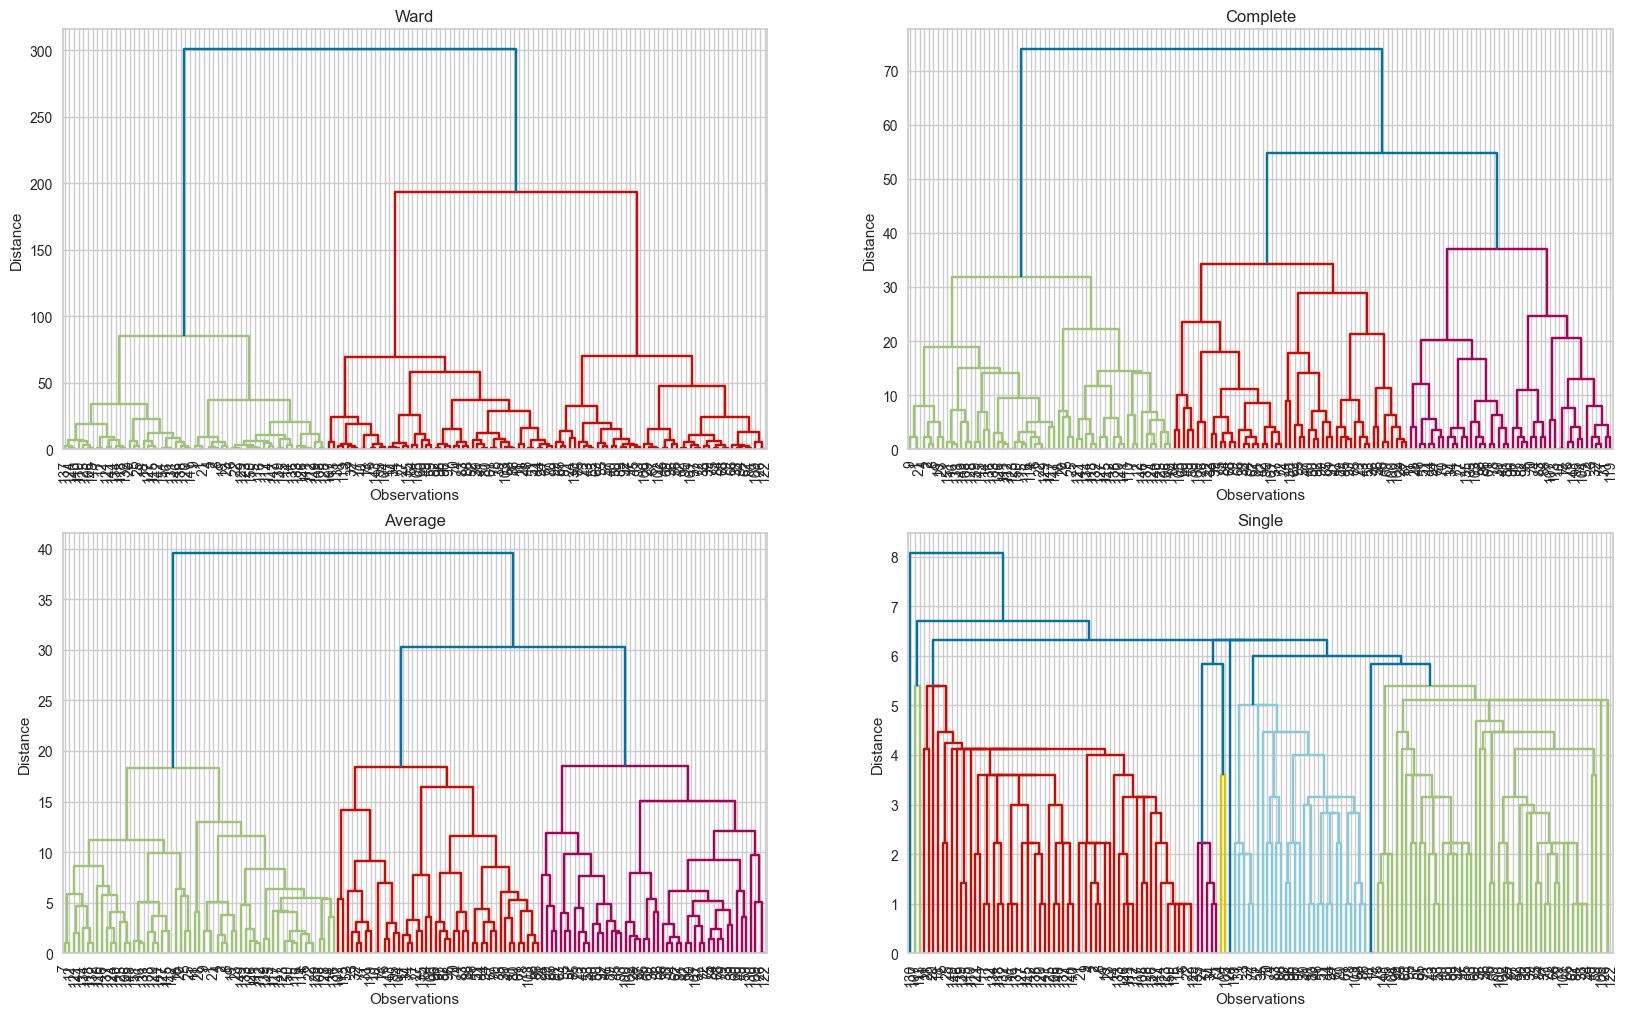

In [1536]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10);

# We will continue with ward as ward provides the minimum distance between clusters and
# the maximum distance between clusters.
# It is the number of clusters that the dendogram shows with the blue line. However,
# the dendogram gives us a suggestion to maximize the distance between the clusters,
# but again, we are not just from the dendogram.
# We will make use of the scatter plot and silhouette score and decide accordingly.

In [1537]:
# Ward looks best, K = 2 or 3, however, we used 4 in non-hierarchical clustering. For sake of comparison, let's stick with K = 4
# We don't use the Elbow Method in Hierarchical clustering

## Clustering based on Age and Spending Score- x2

In [1538]:
from sklearn.cluster import AgglomerativeClustering

In [1539]:
from sklearn.metrics import silhouette_score

In [1540]:
K = range(2, 10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X_HC)
    print(
        f'Silhouette Score for {k} clusters: {silhouette_score(X_HC, model.labels_)}')

# In n_clusters=2 the silhouette score is high but;
# If I choose the number of clusters as 2, one of the clusters will spread over a very large area
# according to the scatterplot.
# So we are thinking if we can choose n_clusters=3. In the ward dendogram ,
# We choose 3 because we see that the minimum inter-cluster distance is at the maximum level within 3 clusters.
# the silhouette score calculated here is the average of all observations (according to clusters)

Silhouette Score for 2 clusters: 0.49268897056794575
Silhouette Score for 3 clusters: 0.5116921257599063
Silhouette Score for 4 clusters: 0.44035204208248385
Silhouette Score for 5 clusters: 0.38286385073738866
Silhouette Score for 6 clusters: 0.3775666406240371
Silhouette Score for 7 clusters: 0.3983789661749852
Silhouette Score for 8 clusters: 0.4120313659842583
Silhouette Score for 9 clusters: 0.40613962545264704


In [1541]:
# to determine K in hierarchical clustering, we use Dendogram and Silhouette Score, NOT the Elbow Method.
# we settle for K = 4

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [1542]:
model = AgglomerativeClustering(n_clusters=4,
                                affinity="euclidean",  # |
                                linkage="ward")
clusters = model.fit_predict(X_HC) 

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1543]:
X_HC["clusters"] = clusters
X_HC.head()

,Age,Spending Score (1-100),clusters
0,19,39,2
1,21,81,1
3,23,77,1
4,31,40,2
5,22,76,1


<Figure size 2000x1000 with 0 Axes>

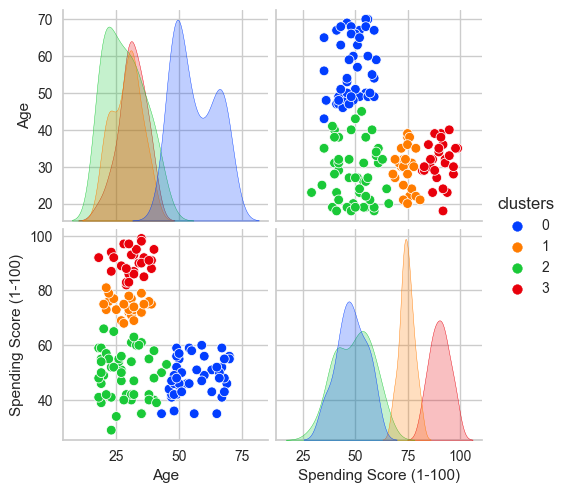

In [1544]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X_HC, hue="clusters", palette="bright");

#### Annual Income and Spending Score- x2

In [1545]:
X2 = df.copy()
X2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [1546]:
X2 = X2.drop("Age", axis=1)  # | when I do only X2.drop("Age", axis=1), it will not drop it!
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [1547]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np

def hopkins(X, ratio=0.05):
    if not isinstance(X, np.ndarray):
        X = X.values  # convert DataFrame to a numpy array

    # 0.05 (5%) based on the paper by Lawson and Jurs
    sample_size = int(X.shape[0] * ratio)

    # A uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))

    # A random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # Initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(
        X_uniform_random_sample, n_neighbors=2)
    # Distance to the first (nearest) neighbour
    u_distances = u_distances[:, 0]

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # Distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # Compute and return Hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

# Now, you can call the function with X2
hopkins_statistic = hopkins(X2)
print("Hopkins Statistic:", hopkins_statistic)


Hopkins Statistic: 0.6331261801490288


In [1548]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

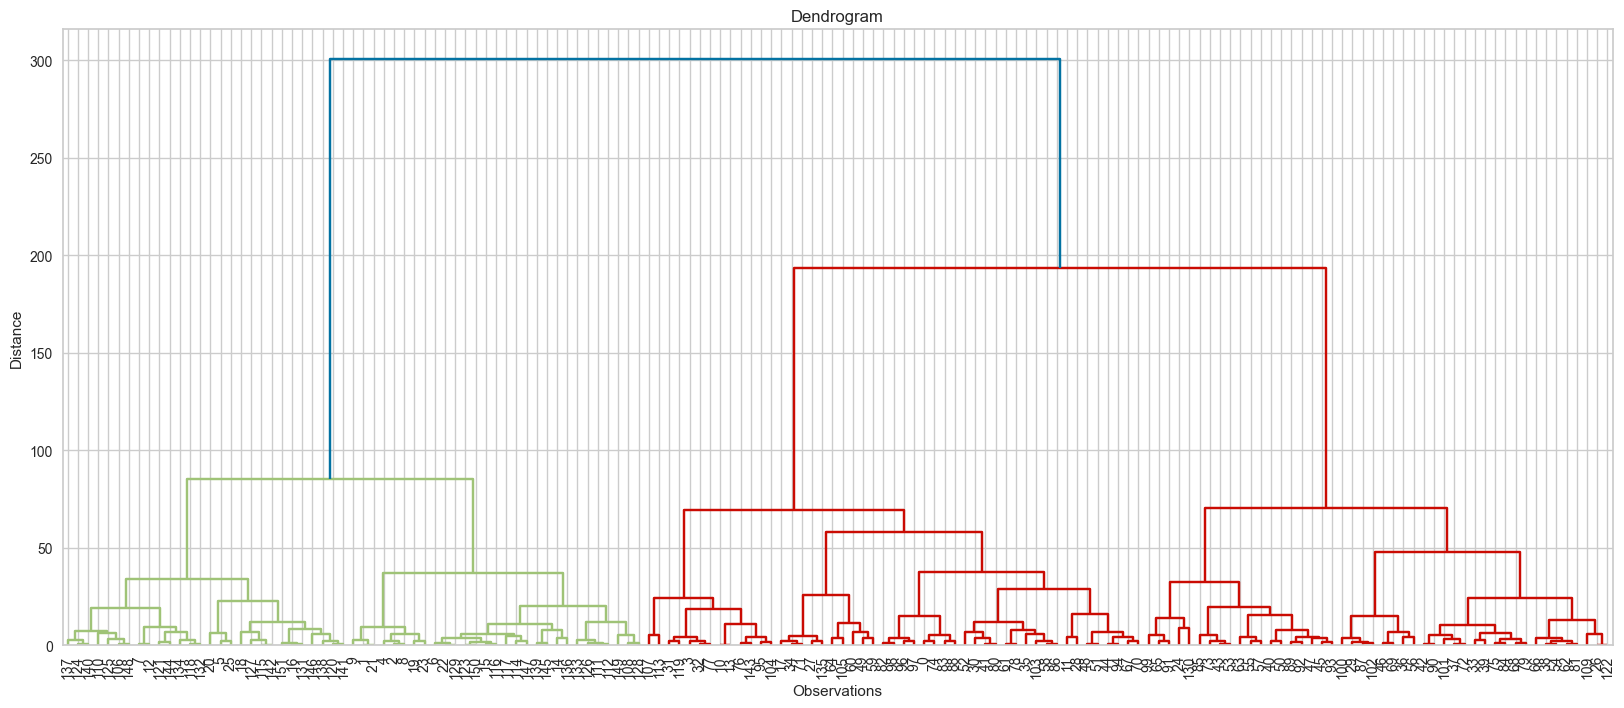

In [1549]:
plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10);

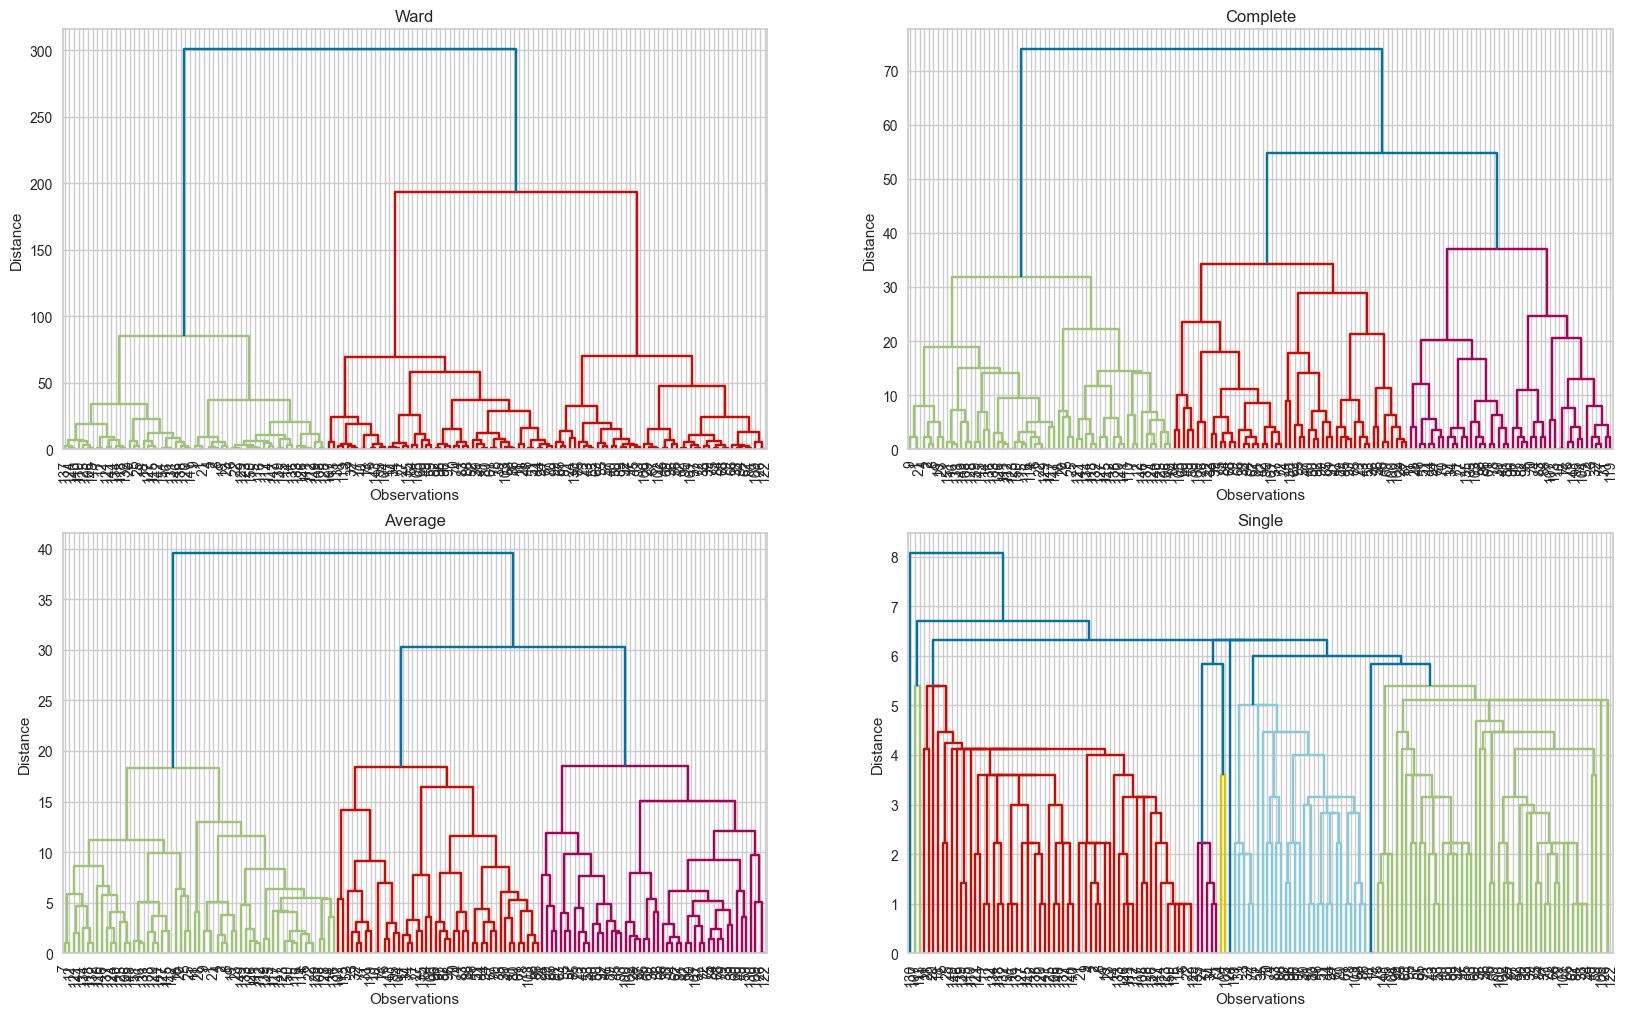

In [1550]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10);

In [1551]:
# Ward looks best, Again, based on dendrograms, K = 2 or 3 would be reasonable.

## Clustering based on Annual Income and Spending Score- x2

In [1552]:
K = range(2, 10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X2)
    print(
        f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [1553]:
# to determine K in hierarchical clustering, we use Dendogram and Silhouette Score, NOT the Elbow Method.
# we settle for K = 5

Apply Agglomerative Clustering with Features Annual Income and Spending Score

In [1558]:
model = AgglomerativeClustering(n_clusters=5,
                                affinity="euclidean",  # |
                                linkage="ward")
clusters2 = model.fit_predict(X2) 

C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1559]:
X2["clusters"] = clusters2
X2

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [1562]:
result = X2.groupby('clusters').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

result_df = result.copy()
result_df

,clusters,Annual Income (k$),Spending Score (1-100)
0,0,89.406250,15.593750
1,1,55.811765,49.129412
2,2,86.538462,82.128205
3,3,25.095238,80.047619
4,4,26.304348,20.913043


### iii. *Visualizing and Labeling All the Clusters* 

<Figure size 2000x1000 with 0 Axes>

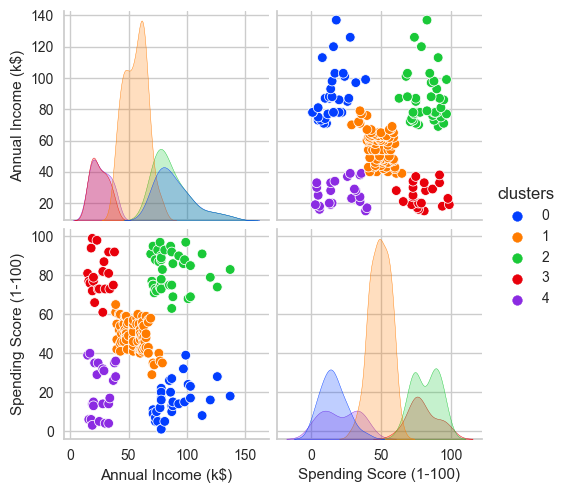

In [1563]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X2, hue="clusters", palette="bright");

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___